In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
#merge station and measurement
session.query(Measurement.date, Measurement.prcp).limit(12).all().\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(Measurement.date.desc())

AttributeError: 'list' object has no attribute 'filter'

In [9]:
inspector = inspect(engine)

In [10]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [13]:
# Find the most recent date in the data set.
data = session.query(Measurement)
for info in data:
    print(info.date)


2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2013-12-22
2013-12-23
2013-12-24
2013-12-25
2013-12-26
2013-12-27
2013-12-28
2013-12-29
2013-12-30
2013-12-31
2014-01-01
2014-01-02
2014-01-03
2014-01-04
2014-01-05
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-10
2014-01-11
2014-01-12
2014-01-13
2014-01-14
2014-01-15
2014-01-16
2014-01-17
2014-01-18
2014-01-19
2014-01-20
2014-01-21
2014-01-22
2014-01-23
2014-01-24
2014-01-25
2014-01-26
2014-01-27
2014-01-28
2014-01-29
2014-01-30
2014-01-31
2014-02-01
2014-02-02
2014-02-03
2014-02-04
2014-02-05
2014-02-06
2014-02-07
2014-02-08
2014-02-09
2014-02-10
2014-02-11
2014-02-12
2014-02-13
2014-02-14
2014-02-15
2014-02-16
2014-02-17
2014-02-18
2014-02-19
2014-02-20
2014-02-21
2014-02-22
2014-02-23
2014-02-24
2014-02-25
2014-02-26
2014-02-27
2014-02-28
2014-03-01
2014-03-02
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-08
2014-03-09
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-14
2014-03-15
2014-03-16
2014-03-17
2014-03-18
2014-03-19
2014-03-20
2014-03-21
2014-03-22

2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-24
2016-09-25
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-01
2016-10-02
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21
2016-11-22
2016-11-23
2016-11-24
2016-11-25
2016-11-26
2016-11-27
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02
2016-12-03
2016-12-04
2016-12-05
2016-12-06
2016-12-07
2016-12-08
2016-12-09
2016-12-10
2016-12-11
2016-12-12
2016-12-13
2016-12-14
2016-12-15
2016-12-16
2016-12-17
2016-12-18
2016-12-19

2011-11-17
2011-11-18
2011-11-19
2011-11-20
2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26
2011-11-27
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07
2012-01-08
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-14
2012-01-15
2012-01-16
2012-01-17
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
2012-02-13
2012-02-14
2012-02-15
2012-02-16

2014-12-24
2014-12-25
2014-12-26
2014-12-27
2014-12-28
2014-12-29
2014-12-30
2014-12-31
2015-01-01
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-17
2015-01-18
2015-01-19
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-24
2015-01-25
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-01-31
2015-02-01
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-07
2015-02-08
2015-02-09
2015-02-10
2015-02-11
2015-02-12
2015-02-13
2015-02-14
2015-02-15
2015-02-16
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-21
2015-02-22
2015-02-23
2015-02-24
2015-02-25
2015-02-26
2015-02-27
2015-02-28
2015-03-01
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-07
2015-03-08
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-14
2015-03-15
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-21
2015-03-22
2015-03-23
2015-03-24

2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-07
2011-08-13
2011-08-15
2011-08-16
2011-08-17
2011-08-18
2011-08-25
2011-08-26
2011-08-27
2011-08-29
2011-08-30
2011-08-31
2011-09-01
2011-09-02
2011-09-03
2011-09-04
2011-09-06
2011-09-07
2011-09-09
2011-09-10
2011-09-12
2011-09-13
2011-09-14
2011-09-15
2011-09-16
2011-09-17
2011-09-19
2011-09-20
2011-09-21
2011-09-22
2011-09-23
2011-09-26
2011-09-27
2011-09-28
2011-09-29
2011-09-30
2011-10-01
2011-10-02
2011-10-03
2011-10-04
2011-10-05
2011-10-06
2011-10-07
2011-10-08
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-22
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-29
2011-10-30
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-05
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-21

2015-09-26
2015-09-27
2015-09-28
2015-09-29
2015-09-30
2015-10-01
2015-10-02
2015-10-03
2015-10-04
2015-10-06
2015-10-07
2015-10-08
2015-10-09
2015-10-10
2015-10-11
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-18
2015-10-19
2015-10-20
2015-10-21
2015-10-22
2015-10-23
2015-10-24
2015-10-25
2015-10-26
2015-10-27
2015-10-28
2015-10-29
2015-10-30
2015-10-31
2015-11-01
2015-11-02
2015-11-03
2015-11-04
2015-11-05
2015-11-06
2015-11-08
2015-11-09
2015-11-10
2015-11-11
2015-11-12
2015-11-13
2015-11-14
2015-11-15
2015-11-16
2015-11-17
2015-11-18
2015-11-19
2015-11-20
2015-11-21
2015-11-22
2015-11-23
2015-11-24
2015-11-25
2015-11-26
2015-11-27
2015-11-28
2015-11-30
2015-12-01
2015-12-02
2015-12-03
2015-12-04
2015-12-07
2015-12-08
2015-12-09
2015-12-10
2015-12-11
2015-12-12
2015-12-13
2015-12-14
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-21
2015-12-22
2015-12-23
2015-12-25
2015-12-27
2015-12-28
2015-12-29
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05

2013-10-16
2013-10-17
2013-10-18
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-14
2013-11-15
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-25
2013-11-26
2013-11-27
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-16
2013-12-17
2013-12-18
2013-12-19
2013-12-20
2013-12-23
2013-12-24
2013-12-26
2013-12-27
2013-12-28
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-21
2014-01-22
2014-01-23
2014-01-24
2014-01-27
2014-01-28
2014-01-29
2014-01-30
2014-02-03
2014-02-04
2014-02-05
2014-02-06
2014-02-07
2014-02-10
2014-02-11
2014-02-12
2014-02-13
2014-02-14
2014-02-19
2014-02-20
2014-02-21
2014-02-24
2014-02-25
2014-02-26
2014-02-28
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-14
2014-03-27
2014-03-28
2014-03-31

2012-04-16
2012-05-02
2012-05-09
2012-05-17
2012-05-18
2012-05-22
2012-05-24
2012-05-25
2012-05-27
2012-05-28
2012-06-01
2012-06-14
2012-06-21
2012-06-26
2012-06-29
2012-07-02
2012-07-20
2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-30
2012-07-31
2012-08-01
2012-08-03
2012-08-06
2012-08-24
2012-09-14
2012-09-17
2012-09-21
2012-09-24
2012-10-05
2012-10-08
2012-10-10
2012-10-11
2012-10-12
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-22
2012-11-01
2012-11-08
2012-11-13
2012-11-15
2012-11-16
2012-11-20
2012-11-26
2012-11-27
2012-12-03
2012-12-06
2013-01-10
2013-01-14
2013-01-23
2013-01-24
2013-01-25
2013-02-01
2013-02-02
2013-02-06
2013-02-07
2013-02-08
2013-02-14
2013-02-15
2013-02-20
2013-02-22
2013-02-25
2013-02-27
2013-04-03
2013-04-05
2013-04-08
2013-04-11
2013-04-15
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-12
2013-08-14
2013-08-19
2013-08-21
2013-08-22
2013-08-23
2013-08-27
2013-08-29
2013-08-30
2013-09-01
2013-09-05
2013-09-06
2013-09-10
2013-09-16

2013-05-17
2013-05-18
2013-05-19
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-26
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-20
2013-07-21
2013-07-22
2013-07-23
2013-07-24
2013-07-25
2013-07-26
2013-07-28
2013-07-29
2013-07-30
2013-07-31
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17

2016-09-30
2016-10-01
2016-10-02
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21
2016-11-22
2016-11-23
2016-11-24
2016-11-25
2016-11-26
2016-11-27
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02
2016-12-03
2016-12-04
2016-12-05
2016-12-06
2016-12-07
2016-12-08
2016-12-10
2016-12-11
2016-12-12
2016-12-13
2016-12-14
2016-12-15
2016-12-16
2016-12-17
2016-12-18
2016-12-19
2016-12-20
2016-12-21
2016-12-22
2016-12-23
2016-12-24
2016-12-25
2016-12-26
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2017-01-01

2012-10-01
2012-10-02
2012-10-03
2012-10-04
2012-10-05
2012-10-06
2012-10-07
2012-10-08
2012-10-09
2012-10-10
2012-10-11
2012-10-12
2012-10-13
2012-10-14
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-19
2012-10-20
2012-10-21
2012-10-22
2012-10-23
2012-10-24
2012-10-25
2012-10-26
2012-10-27
2012-10-28
2012-10-29
2012-10-30
2012-10-31
2012-11-01
2012-11-02
2012-11-03
2012-11-04
2012-11-05
2012-11-06
2012-11-07
2012-11-08
2012-11-09
2012-11-10
2012-11-11
2012-11-12
2012-11-13
2012-11-14
2012-11-15
2012-11-16
2012-11-17
2012-11-18
2012-11-19
2012-11-20
2012-11-21
2012-11-22
2012-11-23
2012-11-24
2012-11-25
2012-11-26
2012-11-27
2012-11-28
2012-11-29
2012-11-30
2012-12-01
2012-12-02
2012-12-03
2012-12-04
2012-12-05
2012-12-06
2012-12-07
2012-12-08
2012-12-09
2012-12-10
2012-12-11
2012-12-12
2012-12-13
2012-12-14
2012-12-15
2012-12-16
2012-12-17
2012-12-18
2012-12-19
2012-12-20
2012-12-21
2012-12-22
2012-12-23
2012-12-24
2012-12-25
2012-12-26
2012-12-27
2012-12-28
2012-12-29
2012-12-30

2014-12-21
2014-12-22
2014-12-23
2014-12-24
2014-12-25
2014-12-26
2014-12-27
2014-12-28
2014-12-29
2014-12-30
2014-12-31
2015-01-01
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-17
2015-01-18
2015-01-19
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-24
2015-01-25
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-01-31
2015-02-01
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-07
2015-02-08
2015-02-09
2015-02-10
2015-02-11
2015-02-12
2015-02-13
2015-02-14
2015-02-15
2015-02-16
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-21
2015-02-22
2015-02-23
2015-02-24
2015-02-25
2015-02-26
2015-02-27
2015-02-28
2015-03-01
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-07
2015-03-08
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-14
2015-03-15
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-21

2010-06-06
2010-06-07
2010-06-08
2010-06-09
2010-06-10
2010-06-11
2010-06-12
2010-06-14
2010-06-15
2010-06-16
2010-06-17
2010-06-18
2010-06-19
2010-06-20
2010-06-21
2010-06-22
2010-06-23
2010-06-24
2010-06-25
2010-06-26
2010-06-27
2010-06-28
2010-06-29
2010-06-30
2010-07-03
2010-07-04
2010-07-05
2010-07-06
2010-07-07
2010-07-08
2010-07-09
2010-07-10
2010-07-12
2010-07-13
2010-07-14
2010-07-15
2010-07-16
2010-07-17
2010-07-18
2010-07-19
2010-07-20
2010-07-21
2010-07-22
2010-07-23
2010-07-24
2010-07-25
2010-07-26
2010-07-27
2010-07-28
2010-07-29
2010-07-30
2010-07-31
2010-08-01
2010-08-02
2010-08-03
2010-08-04
2010-08-05
2010-08-06
2010-08-07
2010-08-08
2010-08-09
2010-08-10
2010-08-11
2010-08-12
2010-08-13
2010-08-14
2010-08-15
2010-08-16
2010-08-17
2010-08-18
2010-08-19
2010-08-20
2010-08-21
2010-08-22
2010-08-23
2010-08-24
2010-08-25
2010-08-26
2010-08-27
2010-08-28
2010-08-29
2010-08-30
2010-08-31
2010-09-01
2010-09-02
2010-09-03
2010-09-05
2010-09-06
2010-09-07
2010-09-08
2010-09-09

2013-09-19
2013-09-20
2013-09-21
2013-09-22
2013-09-23
2013-09-24
2013-09-25
2013-09-26
2013-09-27
2013-09-28
2013-09-29
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-05
2013-10-06
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-12
2013-10-13
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-27
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-02
2013-11-03
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-09
2013-11-10
2013-11-11
2013-11-12
2013-11-13
2013-11-14
2013-11-15
2013-11-16
2013-11-17
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-23
2013-11-24
2013-11-25
2013-11-26
2013-11-27
2013-11-28
2013-11-29
2013-11-30
2013-12-01
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-07
2013-12-08
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-14
2013-12-15
2013-12-16
2013-12-17
2013-12-18

2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-05-01
2011-05-02
2011-05-03
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-08
2011-07-10
2011-07-11
2011-07-13

2015-09-12
2015-09-13
2015-09-14
2015-09-15
2015-09-16
2015-09-17
2015-09-18
2015-09-19
2015-09-20
2015-09-21
2015-09-22
2015-09-23
2015-09-24
2015-09-25
2015-09-26
2015-09-27
2015-09-28
2015-09-29
2015-09-30
2015-10-01
2015-10-02
2015-10-03
2015-10-04
2015-10-05
2015-10-06
2015-10-07
2015-10-08
2015-10-09
2015-10-10
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-17
2015-10-20
2015-10-21
2015-10-22
2015-10-23
2015-10-24
2015-10-25
2015-10-26
2015-10-27
2015-10-28
2015-10-29
2015-10-30
2015-10-31
2015-11-01
2015-11-03
2015-11-04
2015-11-05
2015-11-06
2015-11-07
2015-11-08
2015-11-09
2015-11-10
2015-11-11
2015-11-12
2015-11-13
2015-11-14
2015-11-15
2015-11-17
2015-11-18
2015-11-19
2015-11-20
2015-11-21
2015-11-22
2015-11-23
2015-11-24
2015-11-25
2015-11-26
2015-11-27
2015-11-28
2015-11-29
2015-11-30
2015-12-01
2015-12-02
2015-12-03
2015-12-04
2015-12-05
2015-12-06
2015-12-07
2015-12-08
2015-12-09
2015-12-10
2015-12-11
2015-12-12
2015-12-13
2015-12-15
2015-12-16
2015-12-17

In [14]:
#find the most recent date (advanved SQL day 3, dates activity)
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [18]:
last_12 = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
last_12

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#sqlalcnehmy day 3, student date activity and student dates (DOW activity)

precip = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(12).all()
precip

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0)]

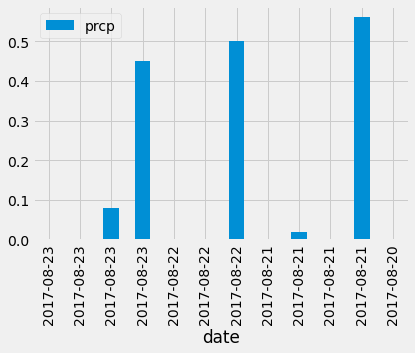

In [16]:
#plot the results of the last 12 dates

plot = pd.DataFrame(precip, columns = ['date', 'prcp'])
plot.set_index('date', inplace = True)
plot.plot.bar()
# plt.tight_layout()
plt.show()

In [ ]:
# Calculate the date one year from the last date in data set.
#this is hard coded
#instructor dates activity
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('One year from last date: ', query_date)

In [ ]:
# Perform a query to retrieve the data and precipitation scores

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [ ]:
# Sort the dataframe by date

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()